In [ ]:
import pandas as pd


df = pd.read_csv('Data Science Job Salaries.csv')
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

df.rename(columns={'salary_in_usd': 'salary', 'remote_ratio': 'job_type'}, inplace=True)

df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior', 'MI': 'Mid', 'EN': 'Entry', 'EX': 'Executive'
})
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'
})
df['company_size'] = df['company_size'].map({
    'S': 'Small', 'M': 'Medium', 'L': 'Large'
})
df['job_type'] = df['job_type'].map({
    0: 'onsite', 50: 'hybrid', 100: 'remote'
})


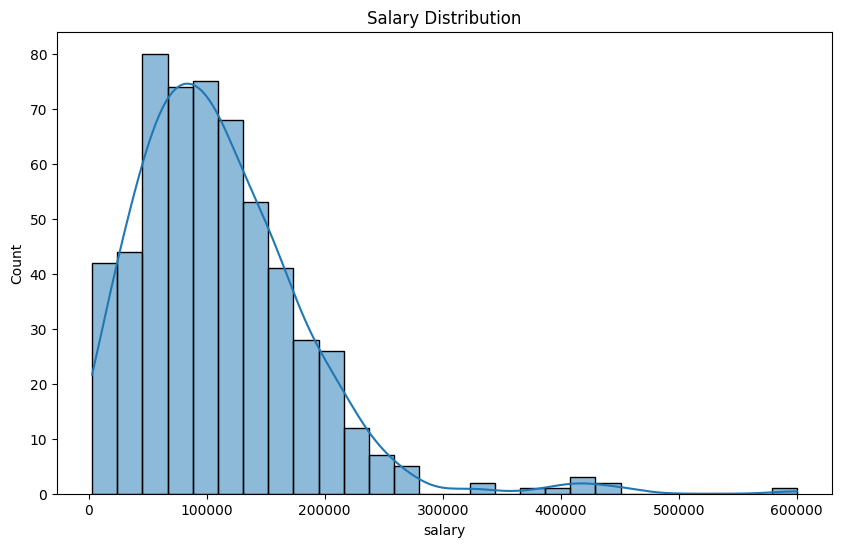

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True)
plt.title('Salary Distribution')
plt.show()


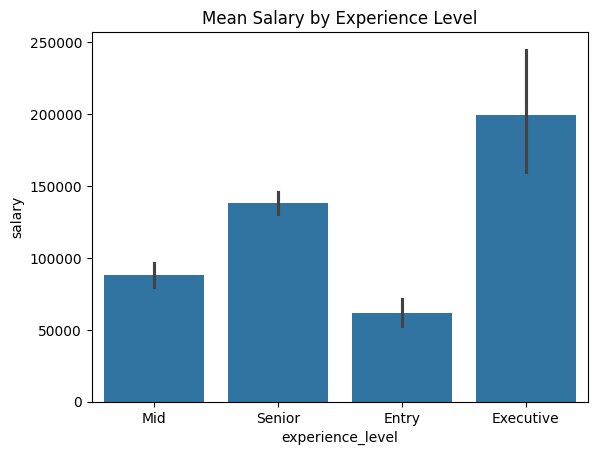

In [ ]:
sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Mean Salary by Experience Level')
plt.show()


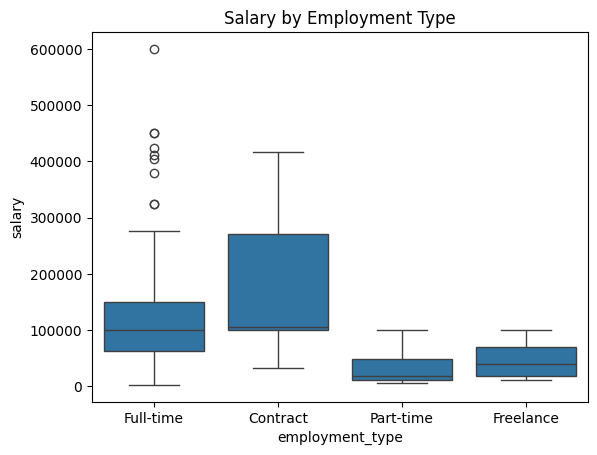

In [ ]:
sns.boxplot(x='employment_type', y='salary', data=df)
plt.title('Salary by Employment Type')
plt.show()


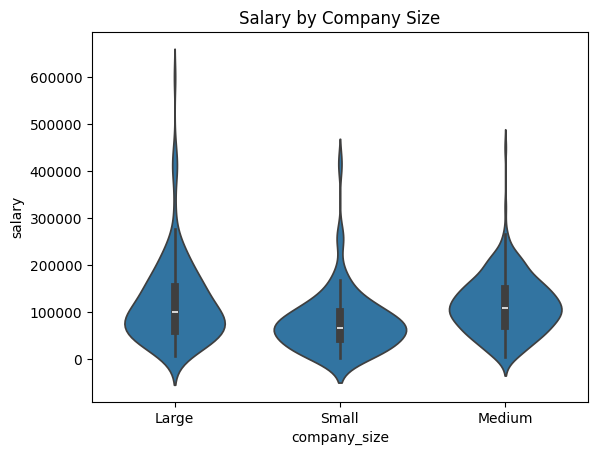

In [ ]:
sns.violinplot(x='company_size', y='salary', data=df)
plt.title('Salary by Company Size')
plt.show()


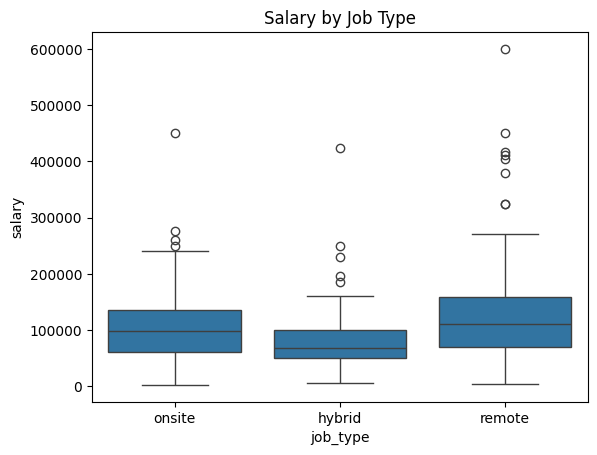

In [ ]:
sns.boxplot(x='job_type', y='salary', data=df)
plt.title('Salary by Job Type')
plt.show()


In [ ]:
# Show actual column names
print(df.columns)

# Convert categorical columns to dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Let's exclude only 'salary' for prediction
X = df_encoded.drop(columns=['salary'])  # Only drop what actually exists
y = df_encoded['salary']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')
MAE: 34375.44412119753
MSE: 3165507637.4879327


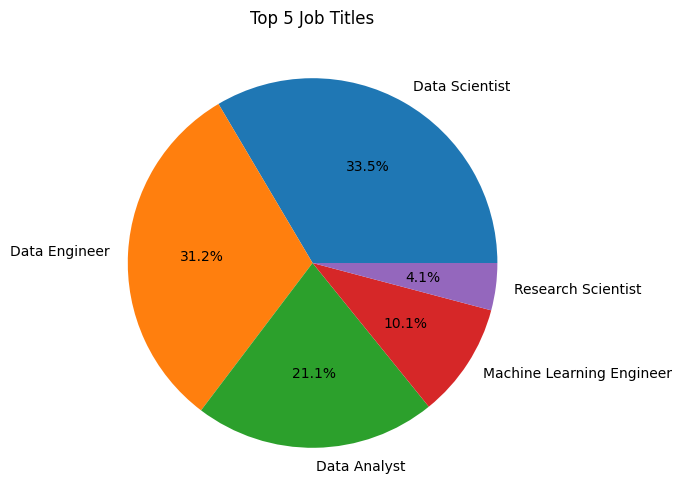

In [ ]:
import matplotlib.pyplot as plt

top_roles = df['job_title'].value_counts().nlargest(5)
top_roles.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Top 5 Job Titles')
plt.ylabel('')
plt.show()


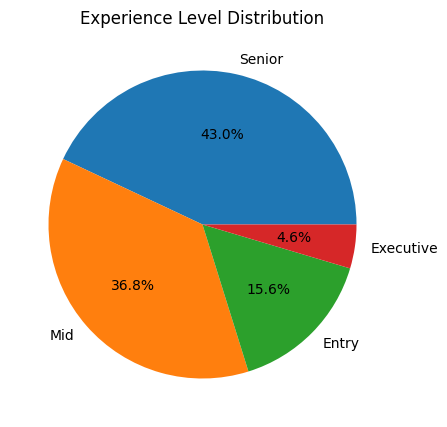

In [ ]:
df['experience_level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5), title='Experience Level Distribution')
plt.ylabel('')
plt.show()



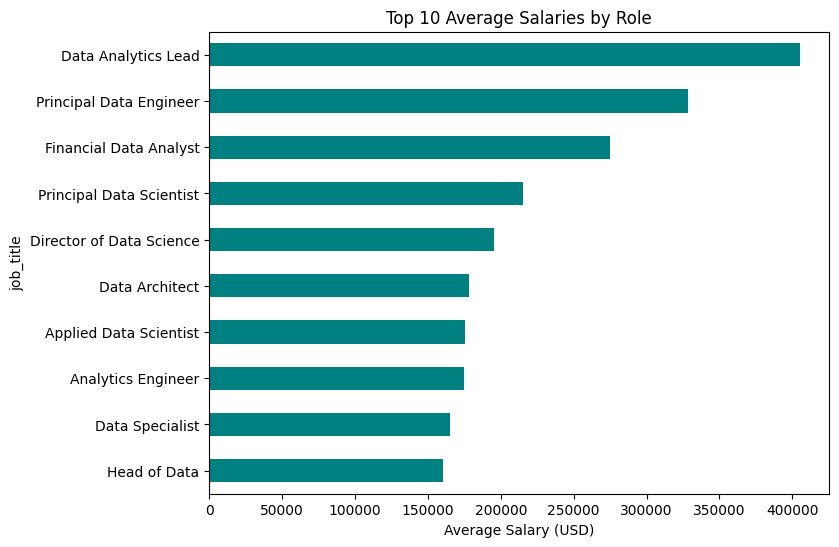

In [ ]:
df.groupby('job_title')['salary'].mean().nlargest(10).sort_values().plot(kind='barh', figsize=(8,6), color='teal')
plt.title('Top 10 Average Salaries by Role')
plt.xlabel('Average Salary (USD)')
plt.show()


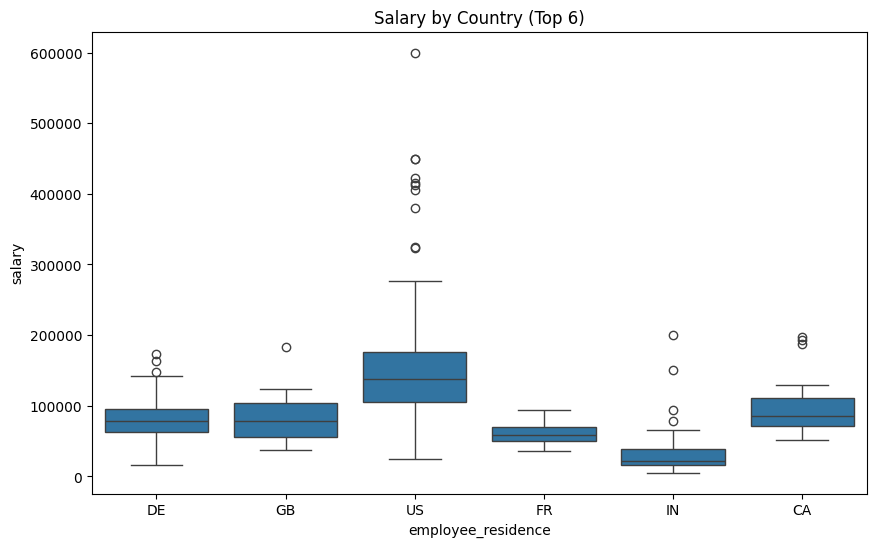

In [ ]:
import seaborn as sns

top_countries = df['employee_residence'].value_counts().nlargest(6).index
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['employee_residence'].isin(top_countries)],
            x='employee_residence', y='salary')
plt.title('Salary by Country (Top 6)')
plt.show()


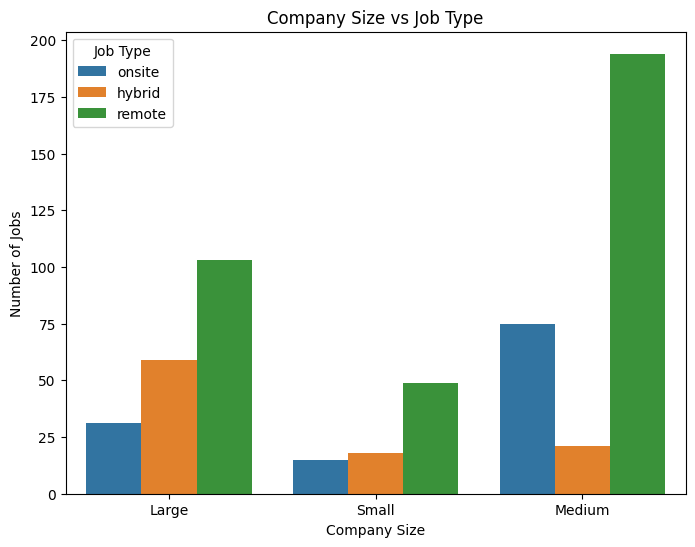

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='company_size', hue='job_type')
plt.title('Company Size vs Job Type')
plt.xlabel('Company Size')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Type')
plt.show()


_